In [1]:
# preparing package, object, and library
import pandas as pd
import numpy as np 

In [2]:
# open the csv file 
pd_feature1 = pd.read_csv("data_CKSNAP_new.csv")
pd_feature2 = pd.read_csv("data_PseKNC_new.csv")
pd_feature3 = pd.read_csv("data_PSTNPss_new.csv") # the feature that give the best accuracy

# get the label every feature
y_feature1 = pd_feature1['Target1']
y_feature2 = pd_feature2['Target2']
y_feature3 = pd_feature3['Target3']

# delete column target
del pd_feature1["Target1"]
del pd_feature2["Target2"]
del pd_feature3["Target3"]

x_feature1 = pd_feature1
x_feature2 = pd_feature2
x_feature3 = pd_feature3

In [3]:
# convert to numpy array 
y_feature1 = np.array(y_feature1)
y_feature2 = np.array(y_feature2)
y_feature3 = np.array(y_feature3)

x_feature1 = np.array(x_feature1)
x_feature2 = np.array(x_feature2)
x_feature3 = np.array(x_feature3)

In [4]:
%run ./best_featureRNA.ipynb 
# create the data set 
dataset1 = Dataset_RNA_1(X=x_feature1,y=y_feature1,nCV= 5)
dataset2 = Dataset_RNA_1(X=x_feature2,y=y_feature1,nCV= 5)
dataset3 = Dataset_RNA_1(X=x_feature3,y=y_feature1,nCV= 5)

# shuffle
X_test1, y_test1, train_data1, train_targets1 =dataset1.shuffle_dataset() 
X_test2, y_test2, train_data2, train_targets2 =dataset2.shuffle_dataset() 
X_test3, y_test3, train_data3, train_targets3 =dataset3.shuffle_dataset() 

# crossfold validation
tt_data1,tt_targets1,tv_data1,tv_targets1 = dataset1.cross_validation()
tt_data2,tt_targets2,tv_data2,tv_targets2 = dataset2.cross_validation()
tt_data3,tt_targets3,tv_data3,tv_targets3 = dataset3.cross_validation()

In [5]:
# its time to train the model 
# lets try using the first fold 

# Machine Learning  : LR,SVM,AB,GB,SGD,RF,KNN
# Deep Learning     : with and without embedding layer, fully connected , CONV1D, ensemble 

%run ./Data_Conversion_1.ipynb
%run ./ML_Module_v1.ipynb
%run ./Performances_Module_1.ipynb
%run ./Data_Visualization_1.ipynb

In [6]:
t_vec_train1,t_vec_val1 = get_vec_data(tt_data1,tt_targets1,5), get_vec_data(tv_data1,tv_targets1,5)
t_vec_train2,t_vec_val2 = get_vec_data(tt_data2,tt_targets2,5), get_vec_data(tv_data2,tv_targets2,5)
t_vec_train3,t_vec_val3 = get_vec_data(tt_data3,tt_targets3,5), get_vec_data(tv_data3,tv_targets3,5)

#t_vec_test1= [X_test1,y_test1.reshape(y_test1.shape[0])]
#t_vec_test2= [X_test2,y_test2.reshape(y_test2.shape[0])]
#t_vec_test3= [X_test3,y_test3.reshape(y_test3.shape[0])]

t_vec_test1= [X_test1,y_test1]
t_vec_test2= [X_test2,y_test2]
t_vec_test3= [X_test3,y_test3]

In [7]:
#fitting the model using Adaboost for all dataset 
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =AB(5,t_vec_train1,t_vec_val1,t_vec_test1)
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2= AB(5,t_vec_train2,t_vec_val2,t_vec_test2)
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3= AB(5,t_vec_train3,t_vec_val3,t_vec_test3)

AB_total_performances_train1,AB_total_performances_test1 = Total_Performances(5, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
AB_total_performances_train2,AB_total_performances_test2 = Total_Performances(5, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
AB_total_performances_train3,AB_total_performances_test3 = Total_Performances(5, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)

In [8]:
#fitting the model using Adaboost for all dataset 
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =GB(5,t_vec_train1,t_vec_val1,t_vec_test1)
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2= GB(5,t_vec_train2,t_vec_val2,t_vec_test2)
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3= GB(5,t_vec_train3,t_vec_val3,t_vec_test3)

GB_total_performances_train1,GB_total_performances_test1 = Total_Performances(5, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
GB_total_performances_train2,GB_total_performances_test2 = Total_Performances(5, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
GB_total_performances_train3,GB_total_performances_test3 = Total_Performances(5, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)

In [9]:
#fitting the model using Adaboost for all dataset 
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =RF(5,t_vec_train1,t_vec_val1,t_vec_test1)
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2= RF(5,t_vec_train2,t_vec_val2,t_vec_test2)
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3= RF(5,t_vec_train3,t_vec_val3,t_vec_test3)

RF_total_performances_train1,RF_total_performances_test1 = Total_Performances(5, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
RF_total_performances_train2,RF_total_performances_test2 = Total_Performances(5, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
RF_total_performances_train3,RF_total_performances_test3 = Total_Performances(5, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)

In [10]:
#fitting the model using Adaboost for all dataset 
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =XGB(5,t_vec_train1,t_vec_val1,t_vec_test1)
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2= XGB(5,t_vec_train2,t_vec_val2,t_vec_test2)
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3= XGB(5,t_vec_train3,t_vec_val3,t_vec_test3)

XGB_total_performances_train1,XGB_total_performances_test1 = Total_Performances(5, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
XGB_total_performances_train2,XGB_total_performances_test2 = Total_Performances(5, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
XGB_total_performances_train3,XGB_total_performances_test3 = Total_Performances(5, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)

In [11]:
#fitting the model using Adaboost for all dataset 
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Stacking(5,t_vec_train1,t_vec_val1,t_vec_test1)
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2= Stacking(5,t_vec_train2,t_vec_val2,t_vec_test2)
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3= Stacking(5,t_vec_train3,t_vec_val3,t_vec_test3)

Stacking_total_performances_train1,Stacking_total_performances_test1 = Total_Performances(5, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
Stacking_total_performances_train2,Stacking_total_performances_test2 = Total_Performances(5, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
Stacking_total_performances_train3,Stacking_total_performances_test3 = Total_Performances(5, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)

In [12]:
AB_tot_perf_train = [AB_total_performances_train1, AB_total_performances_train2, AB_total_performances_train3]
AB_tot_perf_test = [AB_total_performances_test1, AB_total_performances_test2, AB_total_performances_test3]
GB_tot_perf_train = [GB_total_performances_train1, GB_total_performances_train2, GB_total_performances_train3]
GB_tot_perf_test = [GB_total_performances_test1, GB_total_performances_test2, GB_total_performances_test3]
RF_tot_perf_train = [RF_total_performances_train1, RF_total_performances_train2, RF_total_performances_train3]
RF_tot_perf_test = [RF_total_performances_test1, RF_total_performances_test2, RF_total_performances_test3]
XGB_tot_perf_train = [XGB_total_performances_train1, XGB_total_performances_train2, XGB_total_performances_train3]
XGB_tot_perf_test = [XGB_total_performances_test1,XGB_total_performances_test2, XGB_total_performances_test3]
Stacking_tot_perf_train = [Stacking_total_performances_train1, Stacking_total_performances_train2, Stacking_total_performances_train3]
Stacking_tot_perf_test = [Stacking_total_performances_test1,Stacking_total_performances_test2, Stacking_total_performances_test3]

Create_Tables_RNA(AB_tot_perf_train,AB_tot_perf_test, 'adaboost')
Create_Tables_RNA(GB_tot_perf_train,GB_tot_perf_test, 'gradientboost')
Create_Tables_RNA(RF_tot_perf_train,RF_tot_perf_test, 'random forest')
Create_Tables_RNA(XGB_tot_perf_train,XGB_tot_perf_test, 'extreme gradient boost')
Create_Tables_RNA(Stacking_tot_perf_train,Stacking_tot_perf_test, 'Stacking')

+-------------------+-----------+-------+-------+-------+-------+-------+
| mTrain Model Name | Data Type |  ACC  |   SN  |   SP  |  MCC  |  AUC  |
+-------------------+-----------+-------+-------+-------+-------+-------+
|      adaboost     |   CKSNAP  | 0.703 | 0.689 | 0.718 | 0.408 | 0.703 |
|      adaboost     |   PseKNC  | 0.729 | 0.701 | 0.758 |  0.46 |  0.73 |
|      adaboost     |  PSTNPss  | 0.941 | 0.941 | 0.941 | 0.882 | 0.941 |
+-------------------+-----------+-------+-------+-------+-------+-------+
+------------------+-----------+-------+-------+-------+--------+-------+
| mTest Model Name | Data Type |  ACC  |   SN  |   SP  |  MCC   |  AUC  |
+------------------+-----------+-------+-------+-------+--------+-------+
|     adaboost     |   CKSNAP  | 0.562 | 0.515 | 0.604 |  0.12  |  0.56 |
|     adaboost     |   PseKNC  | 0.493 | 0.477 | 0.507 | -0.016 | 0.492 |
|     adaboost     |  PSTNPss  | 0.833 | 0.833 | 0.833 | 0.666  | 0.833 |
+------------------+-----------+------

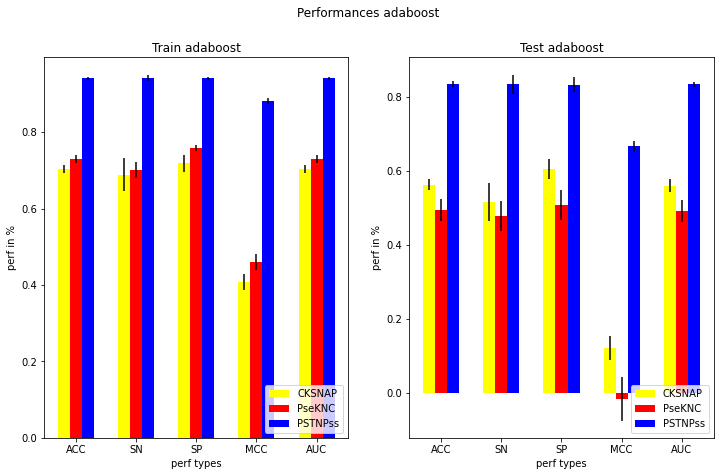

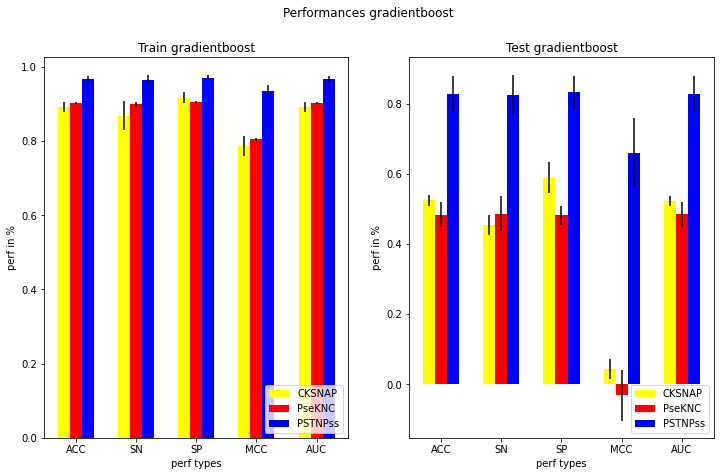

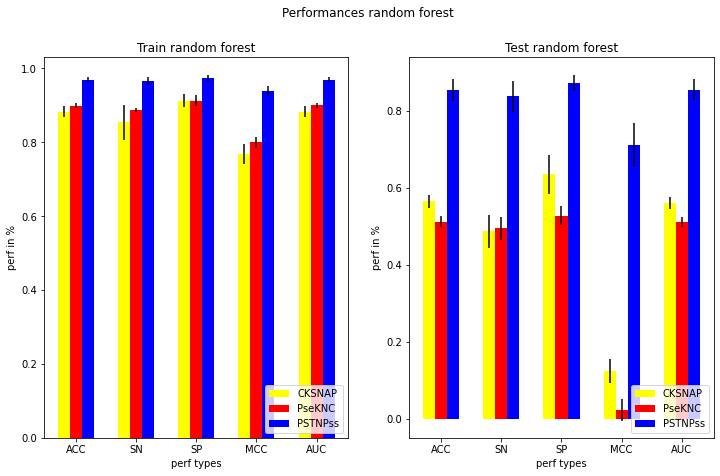

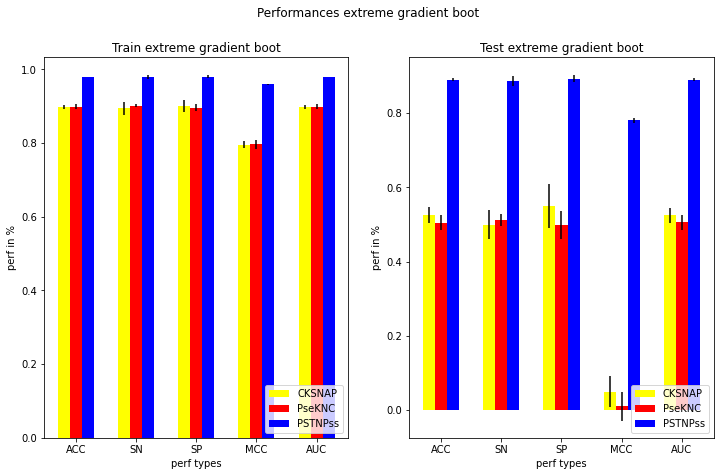

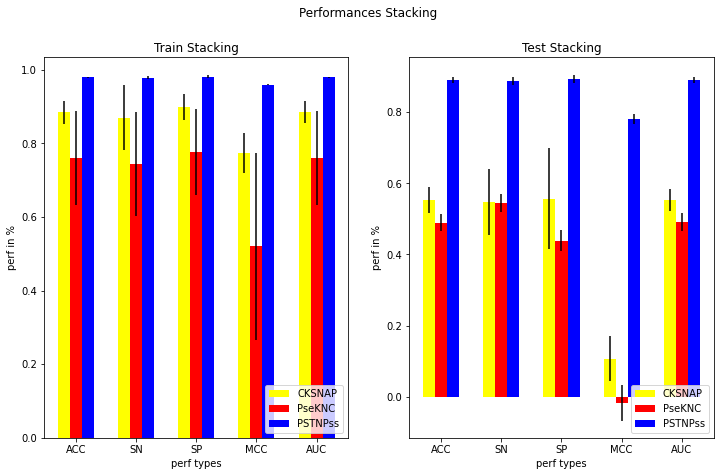

In [13]:
Plot_Performances_RNA(AB_tot_perf_train,AB_tot_perf_test, 'adaboost')
Plot_Performances_RNA(GB_tot_perf_train,GB_tot_perf_test, 'gradientboost')
Plot_Performances_RNA(RF_tot_perf_train,RF_tot_perf_test, 'random forest')
Plot_Performances_RNA(XGB_tot_perf_train,XGB_tot_perf_test, 'extreme gradient boot')
Plot_Performances_RNA(Stacking_tot_perf_train,Stacking_tot_perf_test, 'Stacking')